## Import Libraries
___

In [1]:
import re
import string
import scipy
import pickle
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import *
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from astropy.table import Table, Column

## Read, Understand and Pre-process Train/Test Data
___
### Understand Data

In [2]:
TD=pd.read_csv("C:\\Users\\AWAB\\Documents\\Uni\\Sem 7\\Machine Learning\\A\\2\\train.csv")
Train_Dataset=pd.DataFrame(TD)
 
print("Train Dataset:") 
Train_Dataset

Train Dataset:


,height,weight,hair,beard,scarf,gender
0,180.3000,196,Bald,Yes,No,Male
1,170.0000,120,Long,No,No,Female
2,178.5000,200,Short,No,No,Male
3,163.4000,110,Medium,No,Yes,Female
4,175.2222,220,Short,Yes,No,Male
5,165.0000,150,Medium,No,Yes,Female


In [3]:
print("Train Dataset Columns:") 
print(Train_Dataset.columns)
print("\nTrain instances:",Train_Dataset.shape[0])

Train Dataset Columns:
Index(['height', 'weight', 'hair', 'beard', 'scarf', 'gender'], dtype='object')

Train instances: 6


In [4]:
TED=pd.read_csv("C:\\Users\\AWAB\\Documents\\Uni\\Sem 7\\Machine Learning\\A\\2\\test.csv")
Test_Dataset=pd.DataFrame(TED)
 
print("Test Dataset:") 
Test_Dataset

Test Dataset:


,height,weight,hair,beard,scarf,gender
0,179.1,185,Long,Yes,No,Male
1,160.5,130,Short,No,No,Female
2,177.8,160,Bald,No,No,Male
3,161.1,100,Medium,No,No,Female


In [5]:
print("Test Dataset Columns:") 
print(Test_Dataset.columns)
print("\nTest instances:",Test_Dataset.shape[0])

Test Dataset Columns:
Index(['height', 'weight', 'hair', 'beard', 'scarf', 'gender'], dtype='object')

Test instances: 4


In [6]:
print("3 Train instances having label 'Male':")
print(Train_Dataset.loc[Train_Dataset['gender']=='Male'])

print("\n3 Train instances having label 'Female':")
print(Train_Dataset.loc[Train_Dataset['gender']=='Female'])

3 Train instances having label 'Male':
     height  weight   hair beard scarf gender
0  180.3000     196   Bald   Yes    No   Male
2  178.5000     200  Short    No    No   Male
4  175.2222     220  Short   Yes    No   Male

3 Train instances having label 'Female':
   height  weight    hair beard scarf  gender
1   170.0     120    Long    No    No  Female
3   163.4     110  Medium    No   Yes  Female
5   165.0     150  Medium    No   Yes  Female


In [7]:
print("2 Test instances having label 'Male':")
print(Test_Dataset.loc[Test_Dataset['gender']=='Male'])

print("\n2 Test instances having label 'Female':")
print(Test_Dataset.loc[Test_Dataset['gender']=='Female'])

2 Test instances having label 'Male':
   height  weight  hair beard scarf gender
0   179.1     185  Long   Yes    No   Male
2   177.8     160  Bald    No    No   Male

2 Test instances having label 'Female':
   height  weight    hair beard scarf  gender
1   160.5     130   Short    No    No  Female
3   161.1     100  Medium    No    No  Female




Total no of 'Males' and 'Females' in Train Dataset


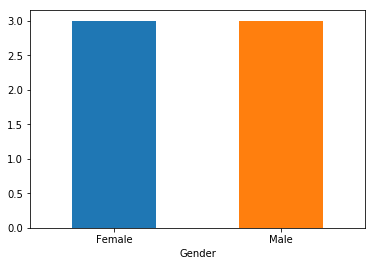


Total no of 'Males' and 'Females' in Test Dataset


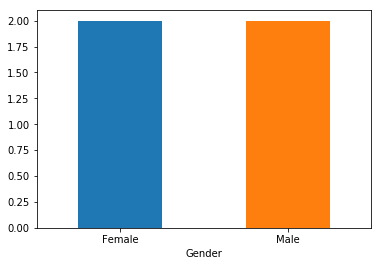

In [8]:
print("\n\nTotal no of 'Males' and 'Females' in Train Dataset")
Train_Dataset['gender'].value_counts().plot(kind='bar', rot=0)
plt.xlabel('Gender')
plt.show()

print("\nTotal no of 'Males' and 'Females' in Test Dataset")
Test_Dataset['gender'].value_counts().plot(kind='bar', rot=0)
plt.xlabel('Gender')
plt.show()

Number of people having various hair length in Train Dataset


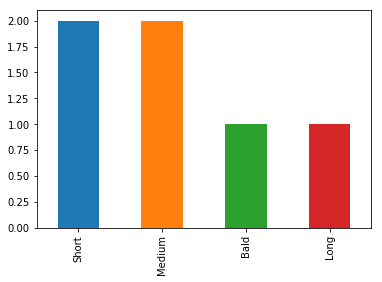



Number of people having various hair length in Test Dataset


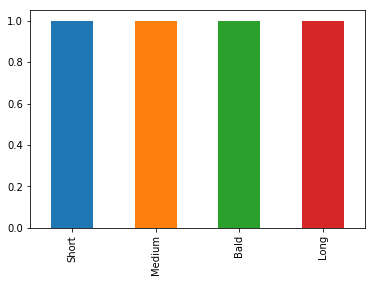

In [9]:
print("Number of people having various hair length in Train Dataset")
Train_Dataset['hair'].value_counts().plot(kind='bar')
plt.show()

print("\n\nNumber of people having various hair length in Test Dataset")
Test_Dataset['hair'].value_counts().plot(kind='bar')
plt.show()


Number of people do/don't have beard in Train Dataset


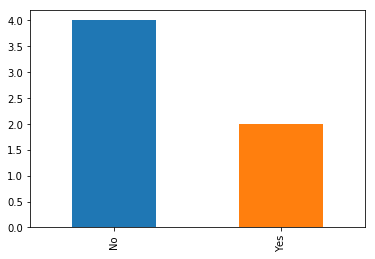



Number of people do/don't have beard in Test Dataset


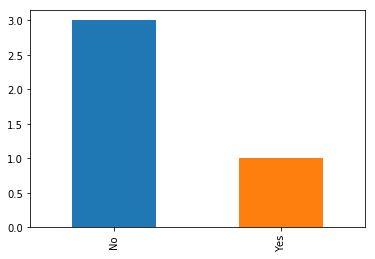

In [10]:
print("\nNumber of people do/don't have beard in Train Dataset")
Train_Dataset['beard'].value_counts().plot(kind='bar')
plt.show()

print("\n\nNumber of people do/don't have beard in Test Dataset")
Test_Dataset['beard'].value_counts().plot(kind='bar')
plt.show()

___

___

___

### Pre-Process Data

In [11]:
print("\n\nTrain dataset before pre-processing:\n")
print(Train_Dataset) 
 
print("\n\n\n\nTrain dataset after pre-processing:\n") 
Train_Dataset_AP=Train_Dataset.round({'height' : 2}) 
print(Train_Dataset_AP)



Train dataset before pre-processing:

     height  weight    hair beard scarf  gender
0  180.3000     196    Bald   Yes    No    Male
1  170.0000     120    Long    No    No  Female
2  178.5000     200   Short    No    No    Male
3  163.4000     110  Medium    No   Yes  Female
4  175.2222     220   Short   Yes    No    Male
5  165.0000     150  Medium    No   Yes  Female




Train dataset after pre-processing:

   height  weight    hair beard scarf  gender
0  180.30     196    Bald   Yes    No    Male
1  170.00     120    Long    No    No  Female
2  178.50     200   Short    No    No    Male
3  163.40     110  Medium    No   Yes  Female
4  175.22     220   Short   Yes    No    Male
5  165.00     150  Medium    No   Yes  Female


___

___

___

___

___

___

## Label Encoding for Train/Test Data
___

In [12]:
print("Gender Attribute Encoding in Train Dataset:\n\n")

print("gender:\n")
print(Train_Dataset['gender']) 

Train_Dataset_AL=Train_Dataset_AP.copy()

Gender_Fit=LabelEncoder().fit(Train_Dataset_AL['gender'])
Train_Dataset_AL['gender'] = Gender_Fit.transform(Train_Dataset_AL['gender'])
print("\nencoded_gender:\n")
print(Train_Dataset_AL['gender'])

Gender Attribute Encoding in Train Dataset:


gender:

0      Male
1    Female
2      Male
3    Female
4      Male
5    Female
Name: gender, dtype: object

encoded_gender:

0    1
1    0
2    1
3    0
4    1
5    0
Name: gender, dtype: int64


In [13]:
print("Scarf Attribute Encoding in Train Dataset:\n\n")

print("scarf:\n")
print(Train_Dataset_AP['scarf']) 

Scarf_Fit=LabelEncoder().fit(Train_Dataset_AL['scarf'])
Train_Dataset_AL['scarf'] = Scarf_Fit.transform(Train_Dataset_AL['scarf'])
print("\nencoded_scarf:\n")
print(Train_Dataset_AL['scarf']) 

Scarf Attribute Encoding in Train Dataset:


scarf:

0     No
1     No
2     No
3    Yes
4     No
5    Yes
Name: scarf, dtype: object

encoded_scarf:

0    0
1    0
2    0
3    1
4    0
5    1
Name: scarf, dtype: int64


In [14]:
print("Beard Attribute Encoding in Train Dataset:\n\n")

print("beard:\n")
print(Train_Dataset_AP['beard']) 

Beard_Fit=LabelEncoder().fit(Train_Dataset_AL['beard'])
Train_Dataset_AL['beard'] = Beard_Fit.transform(Train_Dataset_AL['beard'])
print("\nencoded_beard:\n")
print(Train_Dataset_AL['beard']) 

Beard Attribute Encoding in Train Dataset:


beard:

0    Yes
1     No
2     No
3     No
4    Yes
5     No
Name: beard, dtype: object

encoded_beard:

0    1
1    0
2    0
3    0
4    1
5    0
Name: beard, dtype: int64


In [15]:
print("Hair Attribute Encoding in Train Dataset:\n\n")

print("hair:\n")
print(Train_Dataset_AP['hair']) 

Hair_Fit=LabelEncoder().fit(Train_Dataset_AL['hair'])
Train_Dataset_AL['hair'] = Hair_Fit.transform(Train_Dataset_AL['hair'])
print("\nencoded_hair:\n")
print(Train_Dataset_AL['hair']) 

Hair Attribute Encoding in Train Dataset:


hair:

0      Bald
1      Long
2     Short
3    Medium
4     Short
5    Medium
Name: hair, dtype: object

encoded_hair:

0    0
1    1
2    3
3    2
4    3
5    2
Name: hair, dtype: int64


In [16]:
print("Original Train Data:\n")
print(Train_Dataset_AP)

print("\n\n\nTrain Data after Label Encoding:\n")
print(Train_Dataset_AL)

Original Train Data:

   height  weight    hair beard scarf  gender
0  180.30     196    Bald   Yes    No    Male
1  170.00     120    Long    No    No  Female
2  178.50     200   Short    No    No    Male
3  163.40     110  Medium    No   Yes  Female
4  175.22     220   Short   Yes    No    Male
5  165.00     150  Medium    No   Yes  Female



Train Data after Label Encoding:

   height  weight  hair  beard  scarf  gender
0  180.30     196     0      1      0       1
1  170.00     120     1      0      0       0
2  178.50     200     3      0      0       1
3  163.40     110     2      0      1       0
4  175.22     220     3      1      0       1
5  165.00     150     2      0      1       0


In [17]:
print("Original Test Dataset:\n")
print(Test_Dataset)

Test_Dataset_AL=Test_Dataset.copy()

Gender_Fit_Test=LabelEncoder().fit(Test_Dataset_AL['gender'])
Test_Dataset_AL['gender'] = Gender_Fit_Test.transform(Test_Dataset_AL['gender'])

Scarf_Fit_Test=LabelEncoder().fit(Test_Dataset_AL['scarf'])
Test_Dataset_AL['scarf'] = Scarf_Fit_Test.transform(Test_Dataset_AL['scarf'])

Beard_Fit_Test=LabelEncoder().fit(Test_Dataset_AL['beard'])
Test_Dataset_AL['beard'] = Beard_Fit_Test.transform(Test_Dataset_AL['beard'])

Hair_Fit_Test=LabelEncoder().fit(Test_Dataset_AL['hair'])
Test_Dataset_AL['hair'] = Hair_Fit_Test.transform(Test_Dataset_AL['hair'])

print("\n\n\nTest Data after Label Encoding:\n")
print(Test_Dataset_AL)

Original Test Dataset:

   height  weight    hair beard scarf  gender
0   179.1     185    Long   Yes    No    Male
1   160.5     130   Short    No    No  Female
2   177.8     160    Bald    No    No    Male
3   161.1     100  Medium    No    No  Female



Test Data after Label Encoding:

   height  weight  hair  beard  scarf  gender
0   179.1     185     1      1      0       1
1   160.5     130     3      0      0       0
2   177.8     160     0      0      0       1
3   161.1     100     2      0      0       0


___

___

## Train ML Algorithms using Train Data
___

In [18]:
print("\t\t\tLogistic Regression:\n\nParameters and their values:\n")
lr=LogisticRegression()
print(lr)

print("\n\n\t\t\tRandom Forest Classifier:\n\nParameters and their values:\n")
rfc=RandomForestClassifier()
print(rfc)

print("\n\n\t\t\tLinear SVC:\n\nParameters and their values:\n")
lsvc=LinearSVC()
print(lsvc)

print("\n\n\t\t\tBernoulli NB:\n\nParameters and their values:\n")
bnb=BernoulliNB()
print(bnb)

			Logistic Regression:

Parameters and their values:

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


			Random Forest Classifier:

Parameters and their values:

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


			Linear SVC:

Parameters and their values:

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='o

In [19]:
TrainX=Train_Dataset_AL[['height','weight','hair','beard','scarf']] 
TrainY=Train_Dataset_AL[['gender']]

TestX=Test_Dataset_AL[['height','weight','hair','beard','scarf']] 
TestY=Test_Dataset_AL[['gender']]

___
___

## Evaluate ML Algorithms using Test Data
___

In [20]:
print("Prediction using LogisticRegression:\n\n")
lr.fit(TrainX, TrainY.values.ravel())
Lr_Prediction=lr.predict(TestX)

print(Test_Dataset)
print("\n\npredicted_gender:\n")
print(Gender_Fit.inverse_transform(Lr_Prediction))

Lr_AS=lr.score(TestX,TestY)
print("\n\nAccuracy score =",Lr_AS)

Prediction using LogisticRegression:


   height  weight    hair beard scarf  gender
0   179.1     185    Long   Yes    No    Male
1   160.5     130   Short    No    No  Female
2   177.8     160    Bald    No    No    Male
3   161.1     100  Medium    No    No  Female


predicted_gender:

['Male' 'Female' 'Female' 'Female']


Accuracy score = 0.75


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [21]:
print("Prediction using RandomForestClassifier:\n\n")
rfc.fit(TrainX, TrainY.values.ravel())
Rfc_Prediction=rfc.predict(TestX)

print(Test_Dataset)
print("\n\npredicted_gender:\n")
print(Gender_Fit.inverse_transform(Rfc_Prediction))

Rfc_AS=rfc.score(TestX,TestY)
print("\n\nAccuracy score =",Rfc_AS)

Prediction using RandomForestClassifier:


   height  weight    hair beard scarf  gender
0   179.1     185    Long   Yes    No    Male
1   160.5     130   Short    No    No  Female
2   177.8     160    Bald    No    No    Male
3   161.1     100  Medium    No    No  Female


predicted_gender:

['Male' 'Female' 'Male' 'Female']


Accuracy score = 1.0


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [22]:
print("Prediction using LinearSVC:\n\n")
lsvc.fit(TrainX, TrainY.values.ravel())
Lsvc_Prediction=lsvc.predict(TestX)

print(Test_Dataset)
print("\n\npredicted_gender:\n")
print(Gender_Fit.inverse_transform(Lsvc_Prediction))

Lsvc_AS=lsvc.score(TestX,TestY)
print("\n\nAccuracy score =",Lsvc_AS)

Prediction using LinearSVC:


   height  weight    hair beard scarf  gender
0   179.1     185    Long   Yes    No    Male
1   160.5     130   Short    No    No  Female
2   177.8     160    Bald    No    No    Male
3   161.1     100  Medium    No    No  Female


predicted_gender:

['Male' 'Female' 'Female' 'Female']


Accuracy score = 0.75


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [23]:
print("Prediction using BernoulliNB:\n\n")
bnb.fit(TrainX, TrainY.values.ravel())
Bnb_Prediction=bnb.predict(TestX)

print(Test_Dataset)
print("\n\npredicted_gender:\n")
print(Gender_Fit.inverse_transform(Bnb_Prediction))

Bnb_AS=bnb.score(TestX,TestY)
print("\n\nAccuracy score =",Bnb_AS)

Prediction using BernoulliNB:


   height  weight    hair beard scarf  gender
0   179.1     185    Long   Yes    No    Male
1   160.5     130   Short    No    No  Female
2   177.8     160    Bald    No    No    Male
3   161.1     100  Medium    No    No  Female


predicted_gender:

['Male' 'Female' 'Male' 'Female']


Accuracy score = 1.0


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Selection of Best Model
___

In [24]:
DR=[('LogisticRegression',Lr_AS),('RandomForestClassifier',Rfc_AS),
   ('LinearSVC',Lsvc_AS),('BernoulliNB',Bnb_AS),]
t = Table(rows=DR, names=('Model', 'Accuracy'))
print("Detailed Performance of all the models:\n")
print(t)

Detailed Performance of all the models:

        Model          Accuracy
---------------------- --------
    LogisticRegression     0.75
RandomForestClassifier      1.0
             LinearSVC     0.75
           BernoulliNB      1.0


In [25]:
Best_Model=''
BM_Arr={'LogisticRegression':Lr_AS,'RandomForestClassifier':Rfc_AS,
        'LinearSVC':Lsvc_AS,'BernoulliNB':Bnb_AS}

for i,j in BM_Arr.items():
    if j==1.0:
        Best_Model=i
        break

t2 = Table(rows=[(Best_Model,j)], names=('Model', 'Accuracy'))
print("Best Model:\n")
print (t2)

Best Model:

        Model          Accuracy
---------------------- --------
RandomForestClassifier      1.0


___

___

___

___

## Application Phase
___

### Combine Data(Train+Test)

In [26]:
print("All Features in form of DataFrame:\n")

Combined_Dataset=pd.concat([Train_Dataset_AL,Test_Dataset_AL])
Combined_Dataset

All Features in form of DataFrame:



,height,weight,hair,beard,scarf,gender
0,180.30,196,0,1,0,1
1,170.00,120,1,0,0,0
2,178.50,200,3,0,0,1
3,163.40,110,2,0,1,0
4,175.22,220,3,1,0,1
5,165.00,150,2,0,1,0
0,179.10,185,1,1,0,1
1,160.50,130,3,0,0,0
2,177.80,160,0,0,0,1
3,161.10,100,2,0,0,0


___

___

___

___

___

### Train Best Model on All Data

In [27]:
CombinedX=Combined_Dataset[['height','weight','hair','beard','scarf']] 
CombinedY=Combined_Dataset[['gender']]

rfc.fit(CombinedX,CombinedY.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Save the Trained Model as Pickle File

In [28]:
Combined_Rfc='C:\\Users\\AWAB\\Desktop\\Gender Identification\\combined_rfc.sav'
pickle.dump(rfc,open(Combined_Rfc,'wb'))

___

## Make Prediction on Unseen/New Data
___

### Load the Trained Model

In [29]:
rfc = pickle.load(open(Combined_Rfc, 'rb'))

___

___

___

### Take Input from User

In [39]:
height = input("What is your height? (centimeter) ")
weight = input("What is your weight? (kg) ")
hair = input("What is your hair length? (Bald/Long/Short/Medium) ")
beard = input("Do you have a beard? (Yes/No) ")
scarf = input("Do you wear a scarf? (Yes/No) ")

What is your height? (centimeter) 179.10
What is your weight? (kg) 185
What is your hair length? (Bald/Long/Short/Medium) Long
Do you have a beard? (Yes/No) Yes
Do you wear a scarf? (Yes/No) No


### Conver User Input into Feature Vector

In [40]:
FV = {'height':[float(height)], 'weight':[float(weight)], 'hair':[hair],
      'beard':[beard], 'scarf':[scarf]}

Feature_Vector=pd.DataFrame(FV)
Feature_Vector

,height,weight,hair,beard,scarf
0,179.1,185.0,Long,Yes,No


In [41]:
if scarf=='No':
    Feature_Vector['scarf']=0
else:
    Feature_Vector['scarf']=1

if beard=='No':
    Feature_Vector['beard']=0
else:
    Feature_Vector['beard']=1

if hair=='Bald':
    Feature_Vector['hair']=0
elif hair=='Long':
    Feature_Vector['hair']=1
elif hair=='Short':
    Feature_Vector['hair']=2
else:
    Feature_Vector['hair']=3

print("Encoded DataFrame form:\n")
print(Feature_Vector)

Encoded DataFrame form:

   height  weight  hair  beard  scarf
0   179.1   185.0     1      1      0


### Apply Trained Model on Feature Vector of Unseen Data and Output Prediction to User

In [42]:
Unseen_Prediction = rfc.predict(Feature_Vector)
if Unseen_Prediction == 1:
    print("Male")
else:
    print("Female")

Male
